#In this project use the training data generated below to build a classifier based on a decison trees algorithm.



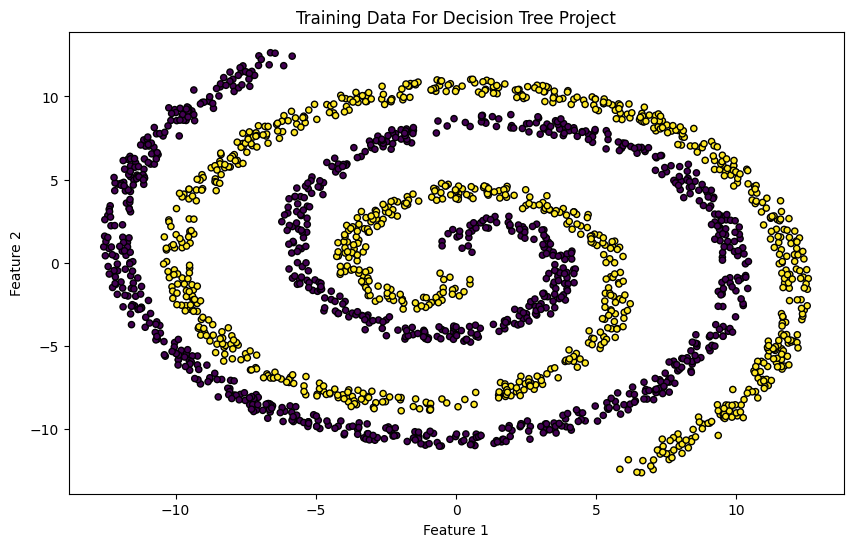

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))), np.hstack((np.zeros(n_points), np.ones(n_points)))

# Generate data
X, y = generate_spiral_data(1000)
dataset = np.column_stack((X, y))
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title("Training Data For Decision Tree Project")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Instructions

### **Option 1**
*   Use the training data provided above and write a decision tree code that uses  only the Numpy and matplotlib library.
*   Plot the decision boundary and the provided training data as shown in the figure below.

*   The code must run without an error and must produce the boundary similart to the figure shown below where all the training data points are classified in the correct region.
*   The depth of the tree must be less than 25.


### **Option 2**
*   Use the training data provided above and write a decision tree code that uses  the library of your choice.
*   Plot the decision boundary and the provided training data as shown in the figure below.

*   The code must run without an error and must produce the boundary similart to the figure shown below where all the training data points are classified in the correct region.
*   The depth of the tree must be less than 25.


Training Accuracy: 1.0
Training Error Rate: 0.0
Test Accuracy: 0.98
Test Error Rate: 0.020000000000000018


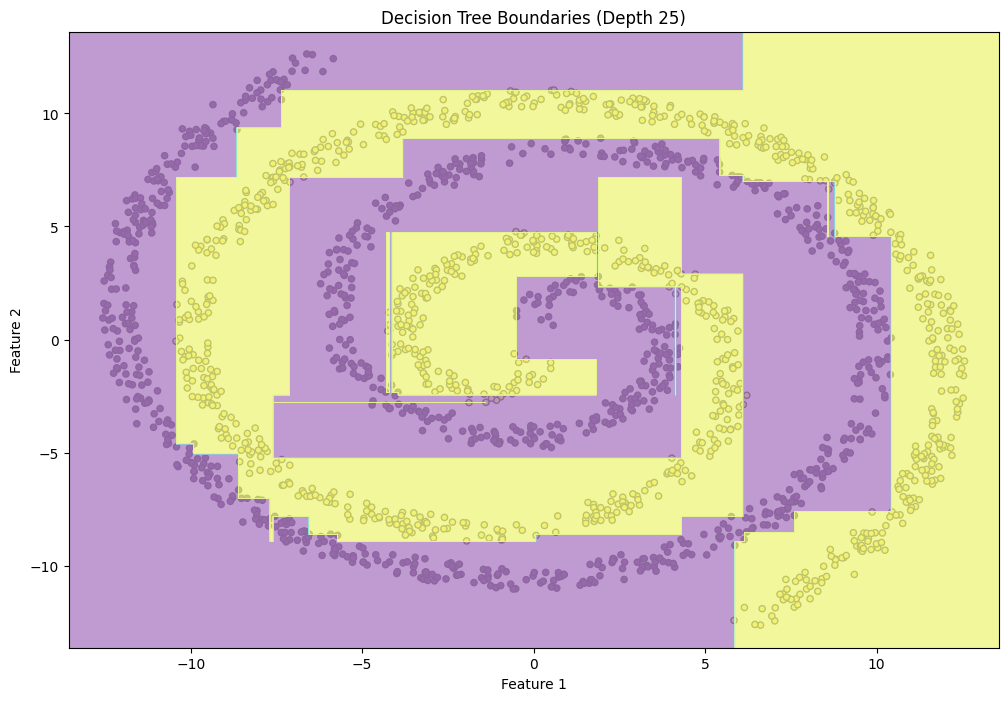

In [ ]:
#Option 1
from matplotlib.colors import ListedColormap

#Decision Tree Class
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if len(np.unique(y)) == 1:
            return {'class': y[0], 'depth': depth}

        if self.max_depth is not None and depth == self.max_depth:
            return {'class': self.most_common_class(y), 'depth': depth}

        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': self.most_common_class(y), 'depth': depth}

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = self.fit(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.fit(X[right_mask], y[right_mask], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree, 'depth': depth}

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gini = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                gini = self.calculate_gini(y[left_mask]) * np.sum(left_mask) / len(y) + \
                       self.calculate_gini(y[right_mask]) * np.sum(right_mask) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def most_common_class(self, y):
        classes, counts = np.unique(y, return_counts=True)
        return classes[np.argmax(counts)]

    def predict(self, X, tree):
        if 'class' in tree:
            return tree['class']

        if X[tree['feature']] <= tree['threshold']:
            return self.predict(X, tree['left'])
        else:
            return self.predict(X, tree['right'])

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

#Run Decision Tree with max depth of 25
dt_classifier = DecisionTree(max_depth=24)

tree = dt_classifier.fit(X_train, y_train)

y_train_pred = np.array([dt_classifier.predict(x, tree) for x in X_train])

#Calculate Accuracy
training_accuracy = dt_classifier.accuracy(y_train, y_train_pred)
training_error_rate = 1 - training_accuracy
print(f"Training Accuracy: {training_accuracy}")
print(f"Training Error Rate: {training_error_rate}")

y_test_pred = np.array([dt_classifier.predict(x, tree) for x in X_test])

test_accuracy = dt_classifier.accuracy(y_test, y_test_pred)
test_error_rate = 1 - test_accuracy
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Error Rate: {test_error_rate}")

#Plot
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, s=20, edgecolors='k')

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array([dt_classifier.predict(np.array([xi, yi]), tree) for xi, yi in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
viridis_original = plt.cm.viridis
saturation_factor = 0.3
colors_adjusted = (viridis_original(np.linspace(0, 1, 256)) ** saturation_factor)
viridis_adjusted = ListedColormap(colors_adjusted)

plt.contourf(xx, yy, Z, cmap=viridis_adjusted, alpha=0.8)

plt.title("Decision Tree Boundaries (Depth 25)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Accuracy: 100.00%


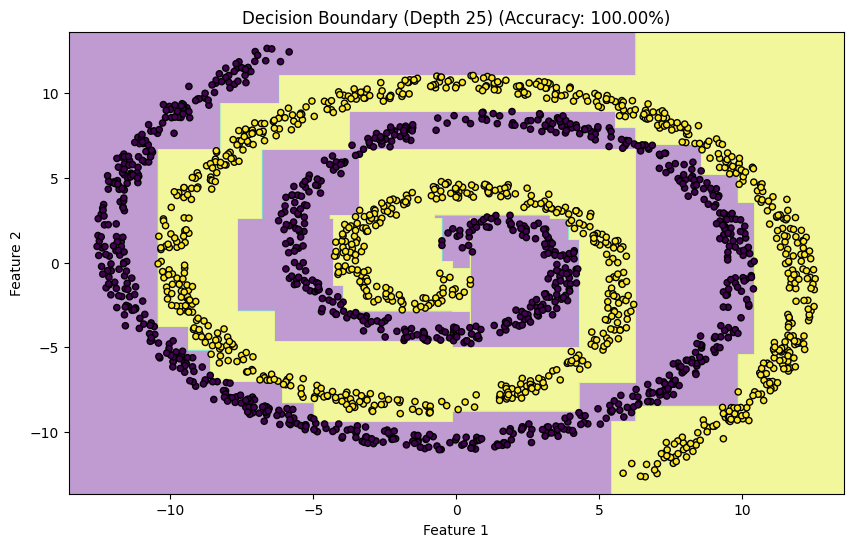

In [ ]:
#Option 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

#Train Decision Tree
clf = DecisionTreeClassifier(max_depth=25)
clf.fit(X, y)

#Predictions
y_pred = clf.predict(X)

#Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Graph Function
def plot_decision_boundary(X, y, model, title):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=viridis_adjusted, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

#Plot
plot_decision_boundary(X, y, clf, "Decision Boundary (Depth 25) (Accuracy: {:.2f}%)".format(accuracy * 100))

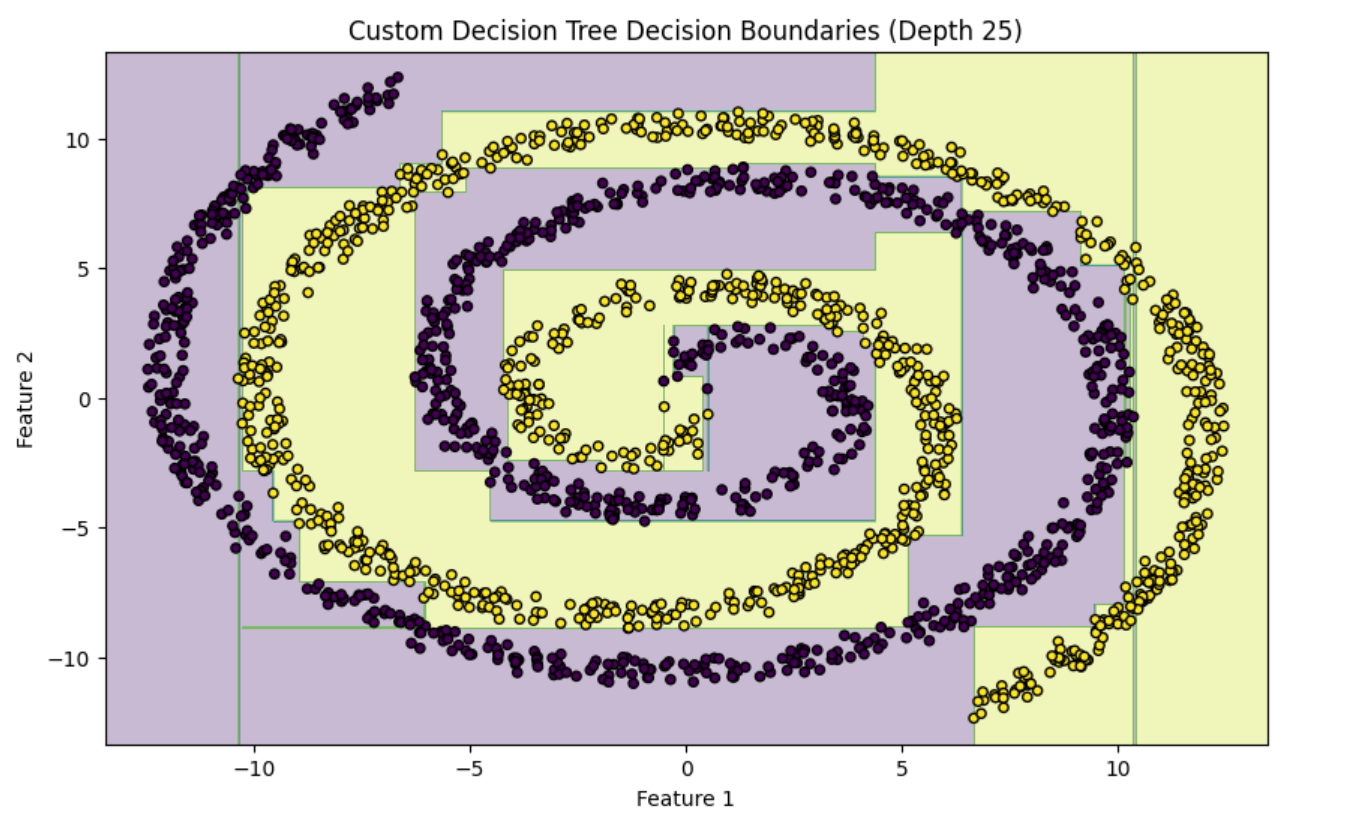